# Eploratory Analysis of Freddie Mac mortgage data

## Overall preparation of the data



In [0]:
# Imports
import math
import operator
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# PATHS

origination_path = "origination_sample.csv"
update_path = "update_sample.csv"

In [3]:
orig_df = pd.read_csv(origination_path)
update_df =  pd.read_csv(update_path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,7,14,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
orig_df.head()

,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,msa,mi_percentage,num_units,occupancy_status,cltv,dti_ratio,original_upb,original_ltv,original_rate,channel,ppm_flag,product_type,property_state,property_type,postal_code,loan_sequence_number,loan_purpose,original_loan_term,num_borrowers,seller_name,servicer_name,super_conforming_flag,pre_harp_lsn
0,806,200911,N,203910,42044.0,0,1,P,6,27,47000,6,5.500,R,N,FRM,CA,SF,92600.0,F109Q3265444,C,360,1,"CITIMORTGAGE,INC","CITIMORTGAGE,INC",NaN,NaN
1,808,201606,9,204605,41940.0,0,1,P,6,48,107000,6,3.750,R,N,FRM,CA,SF,95000.0,F116Q2147949,N,360,2,USBANKNA,USBANKNA,NaN,NaN
2,815,200805,9,201804,35614.0,0,1,P,7,3,41000,7,6.125,R,N,FRM,NJ,SF,7600.0,F108Q1379240,N,120,2,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",NaN,NaN
3,788,200503,9,203502,34940.0,0,1,P,7,6,66000,7,6.000,R,N,FRM,FL,SF,34100.0,F105Q1090945,N,360,2,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",NaN,NaN
4,787,200301,9,203212,12940.0,0,1,P,7,34,142000,7,5.875,T,N,FRM,LA,SF,70700.0,F102Q4366150,N,360,1,WELLSFARGOHOMEMORTGA,"WELLSFARGOBANK,NA",NaN,NaN


In [5]:
orig_df.describe()

,credit_score,first_payment_date,maturity_date,msa,mi_percentage,num_units,cltv,dti_ratio,original_upb,original_ltv,original_rate,postal_code,original_loan_term,num_borrowers,pre_harp_lsn
count,102187.000000,102187.000000,102187.000000,87958.000000,102187.000000,102187.000000,102187.000000,102187.000000,1.021870e+05,102187.000000,102187.000000,102180.000000,102187.000000,102187.000000,0.0
mean,755.645836,200810.291906,203560.937732,30399.858774,14.145929,1.028575,72.768219,45.513823,1.917391e+05,71.675477,5.376428,53316.522803,331.031384,1.596749,NaN
std,404.587320,538.431164,648.793015,11334.692129,96.450279,0.377272,19.111486,107.071221,1.064525e+05,18.671648,1.347730,29678.519831,65.410734,1.383878,NaN
min,300.000000,199902.000000,201408.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,8.000000e+03,6.000000,2.250000,600.000000,90.000000,1.000000,NaN
25%,703.000000,200309.000000,203109.000000,19340.000000,0.000000,1.000000,64.000000,26.000000,1.120000e+05,63.000000,4.250000,29400.000000,360.000000,1.000000,NaN
50%,749.000000,200805.000000,203505.000000,32820.000000,0.000000,1.000000,78.000000,34.000000,1.680000e+05,76.000000,5.500000,53000.000000,360.000000,2.000000,NaN
75%,781.000000,201302.000000,204010.000000,40140.000000,0.000000,1.000000,80.000000,42.000000,2.500000e+05,80.000000,6.375000,80600.000000,360.000000,2.000000,NaN
max,9999.000000,201810.000000,204809.000000,49740.000000,999.000000,99.000000,999.000000,999.000000,1.203000e+06,999.000000,12.000000,99900.000000,480.000000,99.000000,NaN


In [6]:
update_df.head()

,loan_sequence_number,monthly_reporting_period,current_actual_upb,current_lds,loan_age,months_to_maturity,repurchase_flag,modification_flag,zero_balance_code,zero_balance_date,current_interest_rate,current_deffered_upb,ddlpi,mi_recoveries,net_sales_proceeds,non_mi_recoveries,expenses,legal_costs,maintenance_preservation_costs,taxes_insurance,misc_expenses,actual_loss_calculation,modification_cost,step_modification_flag,deferred_payment_modification,estimated_ltv
0,F112Q3022742,201811,205553.10,0,74,285,NaN,NaN,NaN,NaN,3.470,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.1
1,F112Q3052305,201810,83108.63,0,74,286,NaN,NaN,NaN,NaN,3.865,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.9
2,F112Q3188392,201812,89450.91,0,74,286,NaN,NaN,NaN,NaN,3.600,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.3
3,F112Q4003161,201811,129901.23,0,72,288,NaN,NaN,NaN,NaN,3.700,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F112Q4005357,201901,87611.90,0,74,286,NaN,NaN,NaN,NaN,3.449,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.9


In [7]:
update_df.describe()

,monthly_reporting_period,current_actual_upb,loan_age,months_to_maturity,zero_balance_code,zero_balance_date,current_interest_rate,current_deffered_upb,ddlpi,mi_recoveries,non_mi_recoveries,expenses,legal_costs,maintenance_preservation_costs,taxes_insurance,misc_expenses,actual_loss_calculation,modification_cost,estimated_ltv
count,3.139431e+06,3.139431e+06,3.139431e+06,3.139431e+06,41675.000000,41675.000000,3.139431e+06,3.139431e+06,3051.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,70053.000000,629260.000000
mean,2.014252e+05,1.703254e+05,5.017247e+01,2.710650e+02,1.344331,201354.886335,4.722770e+00,2.182818e+02,201271.180597,8614.080868,5477.325444,-15373.760355,-3316.919625,-4857.492604,-6563.236686,-636.146943,-68557.753452,438.475429,53.192386
std,2.730069e+02,1.087168e+05,4.042225e+01,8.316521e+01,1.727437,256.874615,1.121410e+00,3.855349e+03,358.093056,20207.430619,24944.967943,17280.219500,2790.270690,7616.040555,11070.149293,5896.273212,61934.478349,4671.589954,20.408147
min,2.010010e+05,0.000000e+00,0.000000e+00,-1.000000e+00,1.000000,201001.000000,0.000000e+00,0.000000e+00,200705.000000,0.000000,-7853.000000,-160298.000000,-41199.000000,-65821.000000,-125312.000000,-25841.000000,-520030.000000,-2243.530000,0.000000
25%,2.012030e+05,9.009045e+04,1.800000e+01,2.130000e+02,1.000000,201112.000000,3.875000e+00,0.000000e+00,201003.000000,0.000000,153.750000,-20771.000000,-4635.250000,-6103.500000,-7949.500000,-1032.000000,-100212.500000,0.000000,38.900000
50%,2.014100e+05,1.455604e+05,4.000000e+01,2.980000e+02,1.000000,201305.000000,4.625000e+00,0.000000e+00,201112.000000,0.000000,1025.000000,-11301.000000,-3051.000000,-1934.000000,-3593.000000,-400.000000,-56666.500000,0.000000,54.900000
75%,2.017020e+05,2.288113e+05,7.300000e+01,3.360000e+02,1.000000,201603.000000,5.625000e+00,0.000000e+00,201603.000000,0.000000,2291.750000,-4871.250000,-1533.000000,-80.000000,-1144.750000,-220.000000,-23757.750000,0.000000,68.300000
max,2.019030e+05,1.203000e+06,2.410000e+02,4.800000e+02,15.000000,201903.000000,3.750000e+01,1.889712e+05,201901.000000,164453.000000,344156.000000,187918.000000,0.000000,0.000000,61264.000000,258299.000000,55007.000000,167815.930000,414.600000


#Now we begin manipulating the origination data to gain insights

First, lets create the field "Year" so that we can sort/manipulated by year of origination when we need to.

In [0]:
orig_df.insert(2, "Year", value=orig_df["first_payment_date"])
orig_df["Year"] = orig_df["Year"].floordiv(100)

## Let's begin by looking at the proportion of First Time Home Buyers:

In [9]:
# First Time Home Buyer Flag
homebuyer_counts = orig_df['first_time_homebuyer_flag'].value_counts()
homebuyer_counts

N    55580
9    35378
Y    11229
Name: first_time_homebuyer_flag, dtype: int64

In [10]:
percentage_of_buyers = homebuyer_counts['Y']/homebuyer_counts.sum() * 100
percentage_of_buyers

10.988677620440956

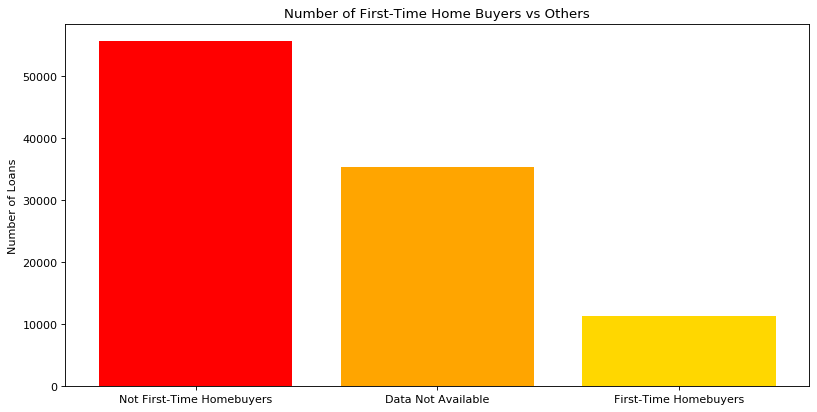

In [11]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(ylabel="Number of Loans")
plt.title("Number of First-Time Home Buyers vs Others")

plt.bar(["Not First-Time Homebuyers", "Data Not Available", "First-Time Homebuyers"], homebuyer_counts, color=["red", "orange", "gold"])

plt.savefig('/content/drive/My Drive/SENSO_ASSIGNMENT/dist_first_time_buyers.png')

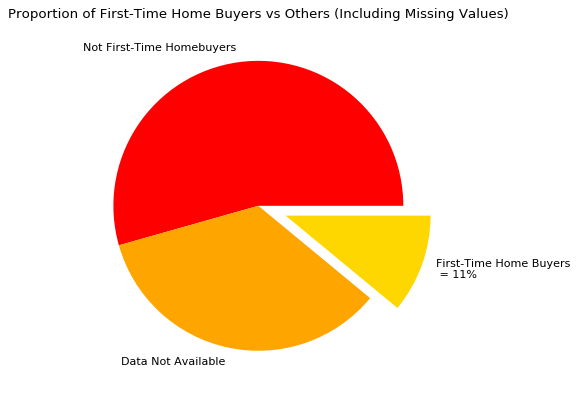

In [12]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Proportion of First-Time Home Buyers vs Others (Including Missing Values)")

plt.pie(homebuyer_counts, explode=[0,0,0.2],colors=["red", "orange", "gold"] , labels=["Not First-Time Homebuyers", "Data Not Available", "First-Time Home Buyers \n = 11%" ] )

plt.savefig('dist_first_time_buyers_pie.png')

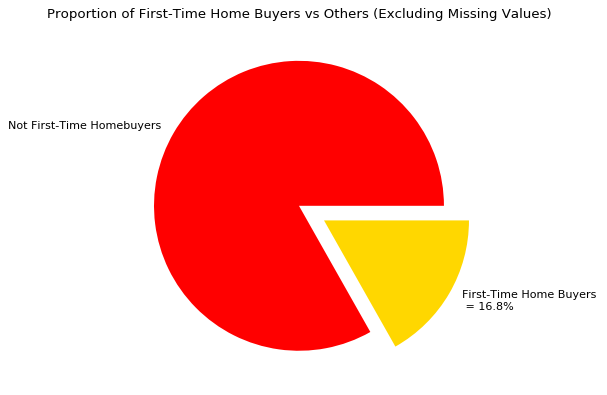

In [13]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Proportion of First-Time Home Buyers vs Others (Excluding Missing Values)")

plt.pie(homebuyer_counts.drop(['9'], axis=0), explode=[0,0.2],colors=["red", "gold"] , labels=["Not First-Time Homebuyers", "First-Time Home Buyers \n = 16.8%"],  )

plt.savefig('dist_first_time_buyers_pie_fixed.png')

## Now lets consider the proportion of first time home buyers by month
We're going to assume that the month of first payment is the month of closure.

In [14]:
homebuyers_df = orig_df[orig_df["first_time_homebuyer_flag"] == 'Y']
both_df = orig_df[orig_df["first_time_homebuyer_flag"] != '9']

homebuyers_df.insert(loc=2, column="Month", value=homebuyers_df["first_payment_date"])
both_df.insert(loc=2, column="Month", value=both_df["first_payment_date"])

# Last two digits of first_payment_date 
homebuyers_df["Month"] = homebuyers_df["Month"].mod(100)
both_df["Month"] = both_df["Month"].mod(100)


both_df
# homebuyers_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,credit_score,first_payment_date,Month,Year,first_time_homebuyer_flag,maturity_date,msa,mi_percentage,num_units,occupancy_status,cltv,dti_ratio,original_upb,original_ltv,original_rate,channel,ppm_flag,product_type,property_state,property_type,postal_code,loan_sequence_number,loan_purpose,original_loan_term,num_borrowers,seller_name,servicer_name,super_conforming_flag,pre_harp_lsn
0,806,200911,11,2009,N,203910,42044.0,0,1,P,6,27,47000,6,5.500,R,N,FRM,CA,SF,92600.0,F109Q3265444,C,360,1,"CITIMORTGAGE,INC","CITIMORTGAGE,INC",NaN,NaN
7,768,200801,1,2008,N,203712,42060.0,0,1,P,7,19,80000,7,6.125,T,N,FRM,CA,SF,93100.0,F107Q4154148,C,360,1,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",NaN,NaN
8,766,201012,12,2010,N,204011,40900.0,0,1,S,7,39,100000,7,4.500,C,N,FRM,CA,PU,96100.0,F110Q4115379,N,360,2,PHHMTGECORP,NEWRESIDENTIALMTGELL,NaN,NaN
10,803,200711,11,2007,Y,203710,37964.0,0,1,P,75,41,30000,8,6.500,R,N,FRM,PA,SF,19300.0,F107Q3213864,P,360,1,"CITIMORTGAGE,INC","CITIMORTGAGE,INC",NaN,NaN
12,706,200304,4,2003,N,203303,28140.0,0,1,P,8,48,90000,8,5.875,R,N,FRM,KS,SF,66200.0,F103Q1081645,C,360,1,Other sellers,"WELLSFARGOBANK,NA",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102180,800,200908,8,2009,N,203907,NaN,0,1,P,999,15,62000,999,4.990,R,N,FRM,MI,SF,49700.0,F109Q2445354,C,360,2,Other sellers,Other servicers,NaN,NaN
102181,801,200509,9,2005,N,202008,41060.0,0,1,P,999,31,57000,999,4.875,T,N,FRM,MN,SF,56300.0,F105Q3459149,N,180,1,WASHINGTONMUTUALBANK,"WELLSFARGOBANK,NA",NaN,NaN
102182,742,200009,9,2000,Y,203008,43300.0,30,1,P,999,37,99000,999,8.375,T,N,FRM,TX,SF,75000.0,F100Q3159248,P,360,1,CHASEMANHATTANMTGECO,CHASEMTGECO,NaN,NaN
102183,795,200704,4,2007,N,202303,31084.0,0,1,P,999,5,18000,999,6.500,R,N,FRM,CA,SF,91700.0,F107Q1307369,N,192,1,"BANKOFAMERICA,NA","BANKOFAMERICA,NA",NaN,NaN


In [15]:
homebuyers_by_month = homebuyers_df["Month"].value_counts()
homebuyers_by_month.sort_index(inplace=True)
homebuyers_by_month


1      849
2      862
3      579
4      702
5      812
6     1000
7     1095
8     1228
9     1148
10    1069
11     969
12     916
Name: Month, dtype: int64

In [16]:
both_by_month = both_df["Month"].value_counts()
both_by_month.sort_index(inplace=True)
both_by_month

1     5066
2     4811
3     4457
4     5086
5     5895
6     5922
7     6085
8     6463
9     6169
10    5824
11    5407
12    5624
Name: Month, dtype: int64

In [0]:
percentages_by_month = homebuyers_by_month.copy()
percentages_by_month = percentages_by_month.divide(both_by_month).multiply(100)

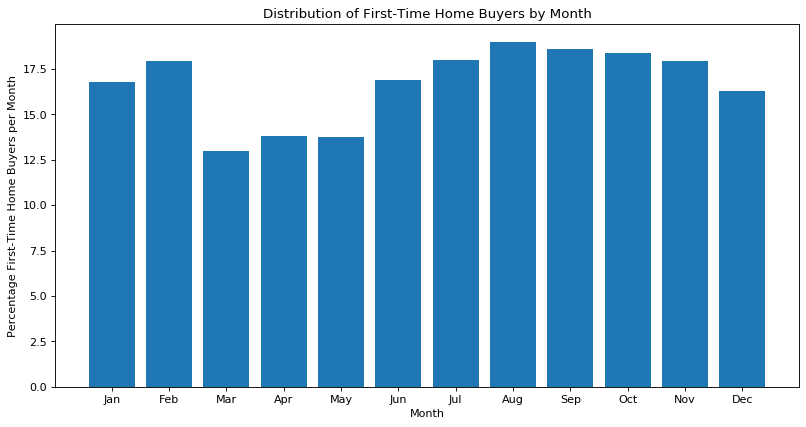

In [18]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Month", ylabel="Percentage First-Time Home Buyers per Month")
plt.title("Distribution of First-Time Home Buyers by Month")


plt.bar(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], percentages_by_month)

plt.savefig('dist_first_time_month.png')


So we can conclude that between July and August, is the peak season for buying homes.

In [0]:
homebuyers_by_year = homebuyers_df["Year"].value_counts()
homebuyers_by_year.sort_index(inplace=True)
homebuyers_by_year

both_by_year = both_df["Year"].value_counts()
both_by_year.sort_index(inplace=True)
both_by_year

percentages_by_year = homebuyers_by_year.copy()
percentages_by_year = percentages_by_year.divide(both_by_year).multiply(100)

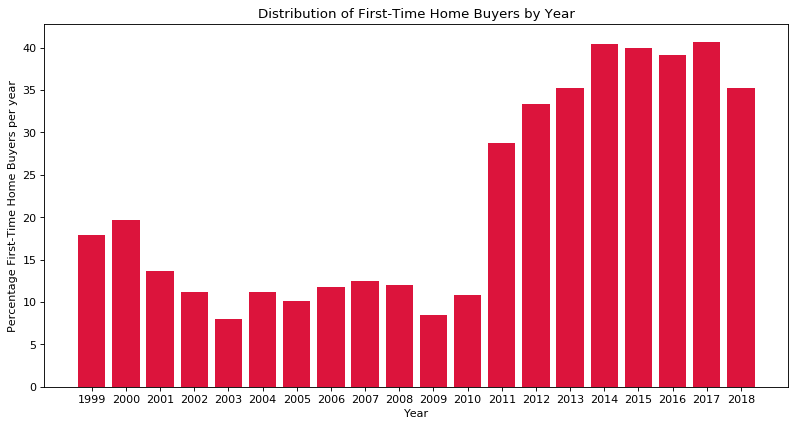

In [20]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Year", ylabel="Percentage First-Time Home Buyers per year")
plt.title("Distribution of First-Time Home Buyers by Year")


plt.bar([str(x) for x in range(1999, 2019)], percentages_by_year, color=["crimson"])
plt.savefig('dist_first_time_year.png')


In [21]:
non_homebuyers_df = orig_df[orig_df["first_time_homebuyer_flag"] == 'N']

non_homebuyers_by_year = non_homebuyers_df["Year"].value_counts()
non_homebuyers_by_year.sort_index(inplace=True)
non_homebuyers_by_year

1999    2449
2000    2022
2001    3923
2002    4520
2003    5257
2004    3373
2005    5091
2006    4105
2007    3996
2008    3809
2009    5212
2010    3519
2011     947
2012     771
2013    1053
2014    1178
2015    1274
2016    1437
2017    1418
2018     226
Name: Year, dtype: int64

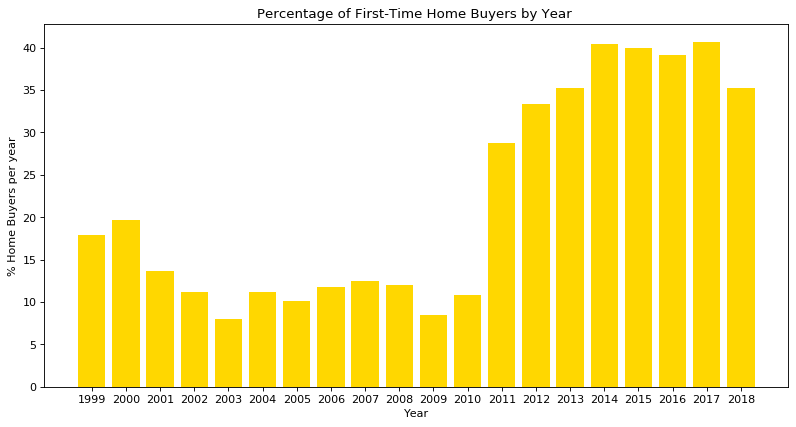

In [22]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Year", ylabel="% Home Buyers per year")
plt.title("Percentage of First-Time Home Buyers by Year ")

heights = homebuyers_by_year.div(homebuyers_by_year.add(non_homebuyers_by_year)).mul(100)

# print(homebuyers_by_year)

# print(non_homebuyers_by_year)

# print(heights)

plt.bar([str(x) for x in range(1999, 2019)], heights, color=["gold"])

plt.savefig('dist_percent_first_time_year.png')


## Now lets consider geographical location:
Which MSA's have the highest median original UPB?

In [23]:
orig_MSA_to_UPBdf = orig_df.filter(items=["msa","original_upb"])
orig_MSA_to_UPBdf.head()

,msa,original_upb
0,42044.0,47000
1,41940.0,107000
2,35614.0,41000
3,34940.0,66000
4,12940.0,142000


In [24]:
orig_MSA_to_UPBdf.sort_values("msa", inplace=True)
orig_MSA_to_UPBdf.dropna("index", inplace=True)
orig_MSA_to_UPBdf.head(10)

,msa,original_upb
14499,10180.0,52000
99978,10180.0,312000
99977,10180.0,100000
99976,10180.0,147000
76724,10180.0,64000
102140,10180.0,94000
76725,10180.0,240000
76727,10180.0,138000
86572,10180.0,79000
76729,10180.0,303000


In [0]:
orig_MSA_to_UPB_all = {}
i = 0
for msa in orig_MSA_to_UPBdf["msa"]:
  if msa not in orig_MSA_to_UPB_all.keys():
    orig_MSA_to_UPB_all[msa] = [orig_MSA_to_UPBdf["original_upb"].iloc[i]]
  else:
    orig_MSA_to_UPB_all[msa].append(orig_MSA_to_UPBdf["original_upb"].iloc[i])
  i+= 1

In [26]:
orig_MSA_to_UPB ={}
for msa in orig_MSA_to_UPB_all.keys():
  orig_MSA_to_UPB[msa] = np.median(orig_MSA_to_UPB_all[msa])

max(orig_MSA_to_UPB.items(), key=operator.itemgetter(1))

(42034.0, 414000.0)

In [27]:
sortedlist = sorted(orig_MSA_to_UPB.items(),key=lambda pair: pair[1], reverse=True)
largest_median_upbs = [sortedlist[i] for i in range(5)]
largest_median_upbs

[(42034.0, 414000.0),
 (11244.0, 364000.0),
 (27980.0, 347000.0),
 (42200.0, 338000.0),
 (41884.0, 330000.0)]

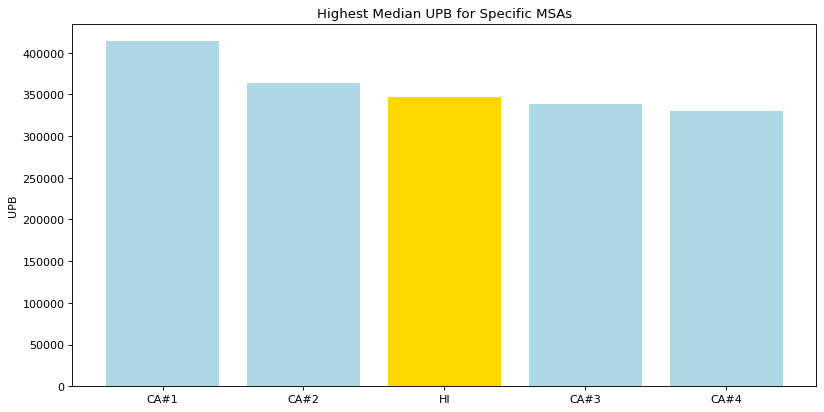

In [28]:
# Corresponding States of the MSA Codes - Manually Looked Up through Excel
states = ['CA#1', 'CA#2', 'HI', 'CA#3', 'CA#4']

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(ylabel="UPB")
plt.title("Highest Median UPB for Specific MSAs")

plt.bar(states, [largest_median_upbs[i][1] for i in range(len(largest_median_upbs))], color=['lightblue','lightblue','gold','lightblue','lightblue'])

plt.savefig('dist_UPB_MSA.png')


From this we can conclude that California and Hawaii have the highest UPB. However, median doesn't tell us how many mortgages were taken around these medians. 

In [29]:
# Number of those properties in each of the above MSA:
orig_MSA_to_UPB_lengths = {}
for msa in orig_MSA_to_UPB.keys():
  orig_MSA_to_UPB_lengths[msa] = len(orig_MSA_to_UPB_all[msa])

largest_median_upb_sizes = [orig_MSA_to_UPB_lengths.get(largest_median_upbs[i][0]) for i in range(5)] 
largest_median_upb_sizes

[43, 524, 17, 55, 485]

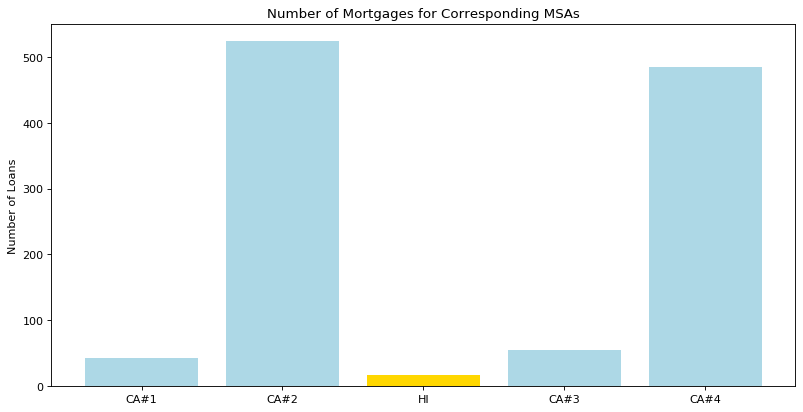

In [30]:
# Corresponding States of the MSA Codes - Manually Looked Up through Excel
states = ['CA#1', 'CA#2', 'HI', 'CA#3', 'CA#4']


plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(ylabel="Number of Loans")
plt.title("Number of Mortgages for Corresponding MSAs")


plt.bar(states, largest_median_upb_sizes, color=['lightblue','lightblue','gold','lightblue','lightblue'])
plt.savefig('dist_MSA_size.png')

As seen above, California seems to have a much larger proportion of homes with high UPBs than Hawaii. 

## Now let's focus on channel originations!

We're going to find the distribution of channel originations from the last 3 years: 2017, 2018, 2019. The dataset only has up till 2018.

In [31]:
last_three_yearsdf = orig_df.copy()

# last_three_yearsdf.insert(2, "Year", value=last_three_yearsdf["first_payment_date"])
# last_three_yearsdf["Year"] = last_three_yearsdf["Year"].floordiv(100)

last_three_yearsdf = last_three_yearsdf[last_three_yearsdf["Year"] >= 2017]
last_three_yearsdf.head(5)

,credit_score,first_payment_date,Year,first_time_homebuyer_flag,maturity_date,msa,mi_percentage,num_units,occupancy_status,cltv,dti_ratio,original_upb,original_ltv,original_rate,channel,ppm_flag,product_type,property_state,property_type,postal_code,loan_sequence_number,loan_purpose,original_loan_term,num_borrowers,seller_name,servicer_name,super_conforming_flag,pre_harp_lsn
37,809,201706,2017,9,204705,35614.0,0,2,P,10,39,65000,10,4.250,R,N,FRM,NJ,SF,7300.0,F117Q2024392,N,360,2,Other sellers,Other servicers,NaN,NaN
40,806,201710,2017,9,203209,16974.0,0,1,P,10,29,133000,10,3.000,C,N,FRM,IL,SF,60000.0,F117Q3269830,N,180,1,"CALIBERHOMELOANS,INC","CALIBERHOMELOANS,INC",NaN,NaN
44,817,201712,2017,N,204711,19740.0,0,1,P,10,32,30000,10,4.125,R,N,FRM,CO,PU,80200.0,F117Q4090037,P,360,1,Other sellers,Other servicers,NaN,NaN
62,736,201701,2017,9,204612,31084.0,0,1,P,11,40,70000,11,3.625,C,N,FRM,CA,SF,91300.0,F116Q4004378,C,360,2,Other sellers,"PNCBANK,NATL",NaN,NaN
90,802,201703,2017,9,204702,36084.0,0,1,P,12,32,80000,12,4.625,R,N,FRM,CA,PU,94500.0,F117Q1013215,C,360,2,"LOANDEPOTCOM,LLC",Other servicers,NaN,NaN


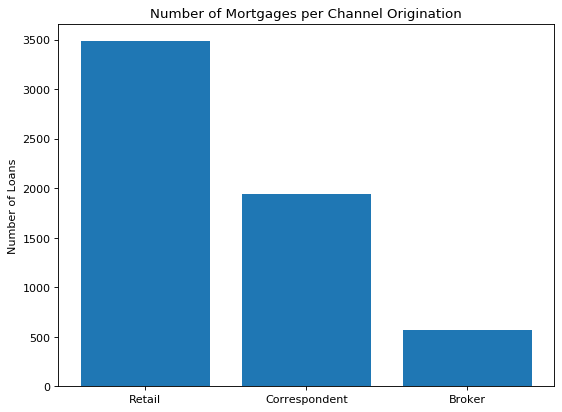

In [32]:
last_three_years_channels = last_three_yearsdf["channel"].value_counts()
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(ylabel="Number of Loans")
plt.title("Number of Mortgages per Channel Origination")

plt.bar(["Retail", "Correspondent", "Broker"], last_three_years_channels )
plt.savefig('dist_channel.png')

## For the next bit, let's analyse the distribution of prepayment penalties.


In [0]:
PPM_distributiondf = orig_df.copy()
PPM_distribution = PPM_distributiondf["ppm_flag"].value_counts()


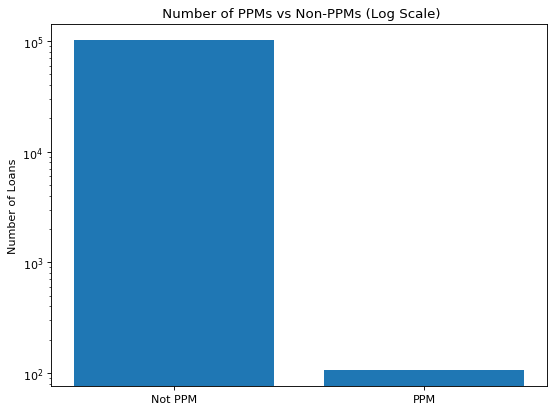

In [34]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(ylabel="Number of Loans")
plt.title(" Number of PPMs vs Non-PPMs (Log Scale)")

PPM_Bar = plt.bar(["Not PPM", "PPM"], PPM_distribution, log=True)
plt.savefig('dist_PPM.png')


Now lets look at the yearly distribution of PPM's to gauge a better understanding of this gap.

In [35]:
# Lets store (Y,N) counts for PPMs year by year
PPM_by_year = {}

i = 0
for loan in PPM_distributiondf["loan_sequence_number"]:
  loan_year = PPM_distributiondf["Year"].iloc[i]
  loan_ppm_flag = PPM_distributiondf["ppm_flag"].iloc[i]
  if loan_year not in PPM_by_year:
    if loan_ppm_flag == "Y":
      PPM_by_year[loan_year] = [1, 0]
    elif loan_ppm_flag == "N":
      PPM_by_year[loan_year] = [0, 1]
  else:
    if loan_ppm_flag == "Y":
      PPM_by_year[loan_year][0] += 1
    elif loan_ppm_flag == "N":
      PPM_by_year[loan_year][1] += 1
  i+=1

PPM_by_year

{1999: [26, 3747],
 2000: [2, 2837],
 2001: [1, 6080],
 2002: [4, 6894],
 2003: [19, 8166],
 2004: [13, 4490],
 2005: [18, 6412],
 2006: [13, 5120],
 2007: [10, 4878],
 2008: [1, 4926],
 2009: [0, 7522],
 2010: [0, 4872],
 2011: [0, 4027],
 2012: [0, 5071],
 2013: [0, 5670],
 2014: [0, 3816],
 2015: [0, 5175],
 2016: [0, 5914],
 2017: [0, 5237],
 2018: [0, 755]}

Now, lets plot these figures:

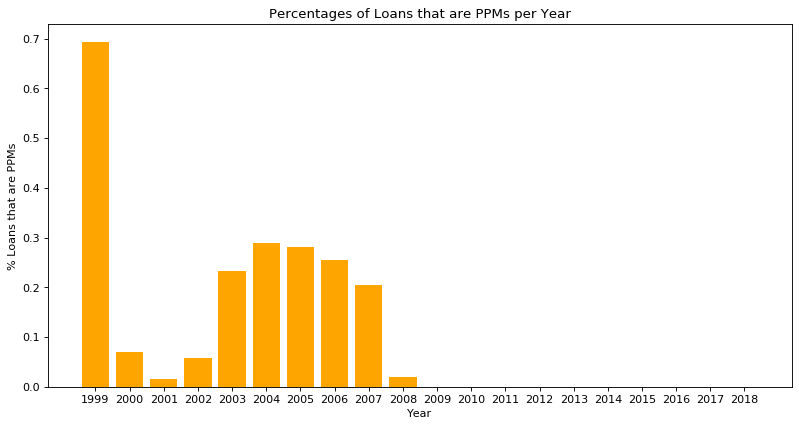

In [36]:
# Plotting the PPMs

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Year", ylabel="% Loans that are PPMs")
plt.title("Percentages of Loans that are PPMs per Year")


labels_str = sorted([str(key) for key in PPM_by_year.keys()])
labels = sorted([key for key in PPM_by_year.keys()])
heights = [PPM_by_year[key][0]/PPM_by_year[key][1]*100 for key in labels]

plt.bar(labels, heights, tick_label=[x for x in range(1999, 2019)], color=["orange"])
plt.savefig('dist_PPM_percent_year.png')

We can see here that there have been no PPMs since 2008, presumably because of the housing crisis.

## Considering the housing crisis had such a huge impact on the market, lets see how it affected LTVs.


In [0]:
LTV_distributiondf = orig_df.copy()
LTV_by_year = {}
CLTV_by_year = {}

i = 0
for loan in LTV_distributiondf["loan_sequence_number"]:
  loan_year = LTV_distributiondf["Year"].iloc[i]
  loan_ltv = LTV_distributiondf["original_ltv"].iloc[i]
  if loan_year not in LTV_by_year.keys():
    LTV_by_year[loan_year] = [loan_ltv]
  else:
    LTV_by_year[loan_year].append(loan_ltv)
  i+=1


In [38]:
# Lets find the mean LTV for each year
LTV_means = {}
for year in LTV_by_year:
  LTV_means[year] = np.mean(LTV_by_year[year])
LTV_means

{1999: 76.57301055884625,
 2000: 78.38657811953863,
 2001: 75.93537805478104,
 2002: 74.03610108303249,
 2003: 71.68006801894813,
 2004: 73.80230752163301,
 2005: 70.45881255828411,
 2006: 70.44704049844236,
 2007: 72.47509187423438,
 2008: 70.68638816709974,
 2009: 65.76795142555439,
 2010: 66.59832721338229,
 2011: 67.67697594501718,
 2012: 67.4021268215833,
 2013: 69.70987654320987,
 2014: 75.35620743844945,
 2015: 73.52530911901081,
 2016: 73.1160472972973,
 2017: 73.73115817592063,
 2018: 72.81059602649006}

In [39]:
# lets find the median LTV for each year
LTV_medians = {}
for year in LTV_by_year:
  LTV_medians[year] = np.median(LTV_by_year[year])
LTV_medians

{1999: 80.0,
 2000: 80.0,
 2001: 80.0,
 2002: 79.0,
 2003: 76.0,
 2004: 79.0,
 2005: 76.0,
 2006: 77.0,
 2007: 78.0,
 2008: 75.0,
 2009: 70.0,
 2010: 72.0,
 2011: 73.0,
 2012: 72.0,
 2013: 75.0,
 2014: 80.0,
 2015: 79.0,
 2016: 77.0,
 2017: 79.0,
 2018: 77.0}

In [0]:
i = 0
for loan in LTV_distributiondf["loan_sequence_number"]:
  loan_year = LTV_distributiondf["Year"].iloc[i]
  loan_cltv = LTV_distributiondf["cltv"].iloc[i]
  if loan_year not in CLTV_by_year.keys():
    CLTV_by_year[loan_year] = [loan_cltv]
  else:
    CLTV_by_year[loan_year].append(loan_cltv)
  i+=1


In [41]:
# Lets find the mean CLTV for each year
CLTV_means = {}
for year in CLTV_by_year:
  CLTV_means[year] = np.mean(CLTV_by_year[year])
CLTV_means

{1999: 76.63739376770538,
 2000: 78.77245718280322,
 2001: 76.61669673609973,
 2002: 75.00736462093863,
 2003: 72.89384185594558,
 2004: 75.44774794763701,
 2005: 72.0716506061548,
 2006: 72.65926791277259,
 2007: 75.27276439363006,
 2008: 71.98620827503498,
 2009: 67.14994720168954,
 2010: 67.71644226846185,
 2011: 68.74521354933727,
 2012: 68.48326112642772,
 2013: 70.4910052910053,
 2014: 75.88292299633316,
 2015: 74.08442812982999,
 2016: 73.60084459459459,
 2017: 74.10742224766265,
 2018: 72.95231788079471}

In [42]:
# lets find the median CLTV for each year
CLTV_medians = {}
for year in CLTV_by_year:
  CLTV_medians[year] = np.median(CLTV_by_year[year])
CLTV_medians

{1999: 80.0,
 2000: 80.0,
 2001: 80.0,
 2002: 79.0,
 2003: 77.0,
 2004: 80.0,
 2005: 77.0,
 2006: 79.0,
 2007: 80.0,
 2008: 77.0,
 2009: 72.0,
 2010: 73.0,
 2011: 74.0,
 2012: 73.0,
 2013: 75.0,
 2014: 80.0,
 2015: 80.0,
 2016: 78.0,
 2017: 80.0,
 2018: 78.0}

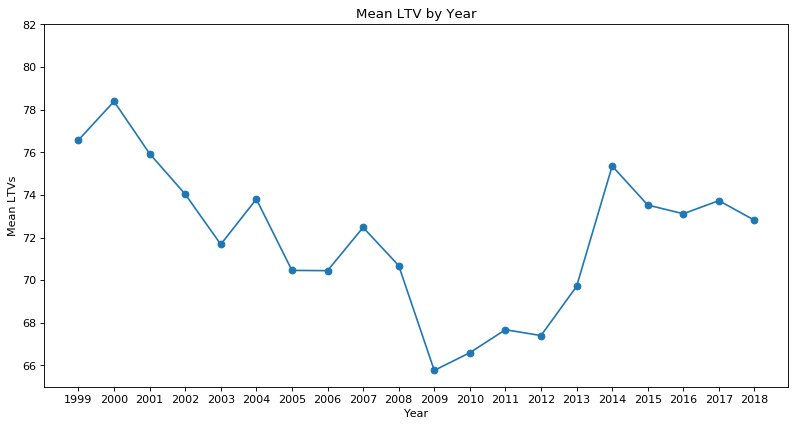

In [43]:
# Plotting the Mean LTVs
labels_str = sorted([str(key) for key in LTV_by_year.keys()])
labels = sorted([int(key) for key in LTV_by_year.keys()])
heights = [LTV_means[key]for key in labels]

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Year", ylabel="Mean LTVs", xticklabels=labels, )
plt.title("Mean LTV by Year")
plt.ylim(65,82)

plt.scatter(x=labels_str, y=heights, )
plt.plot(labels_str, heights)

plt.savefig('dist_mean_LTV_year.png')

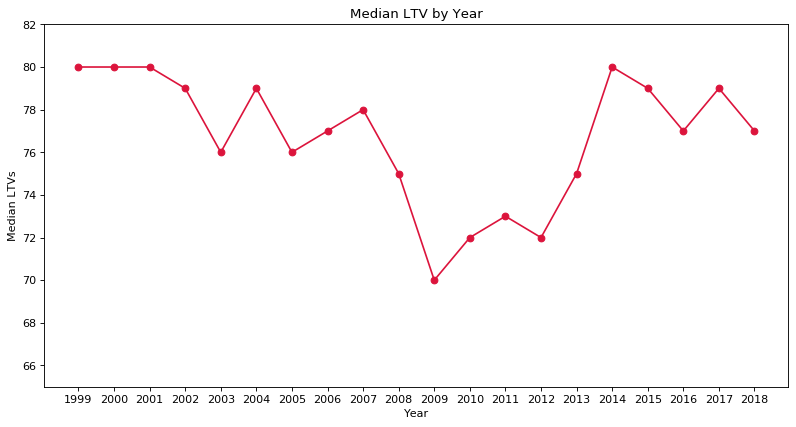

In [44]:
# Plotting the Median LTVs
labels_str = sorted([str(key) for key in LTV_by_year.keys()])
labels = sorted([int(key) for key in LTV_by_year.keys()])
heights = [LTV_medians[key]for key in labels]

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Year", ylabel="Median LTVs", xticklabels=labels, )
plt.title("Median LTV by Year")

plt.ylim(65,82)
plt.scatter(x=labels_str, y=heights, color="crimson")
plt.plot(labels_str, heights, color="crimson")

plt.savefig('dist_median_LTV_year.png')

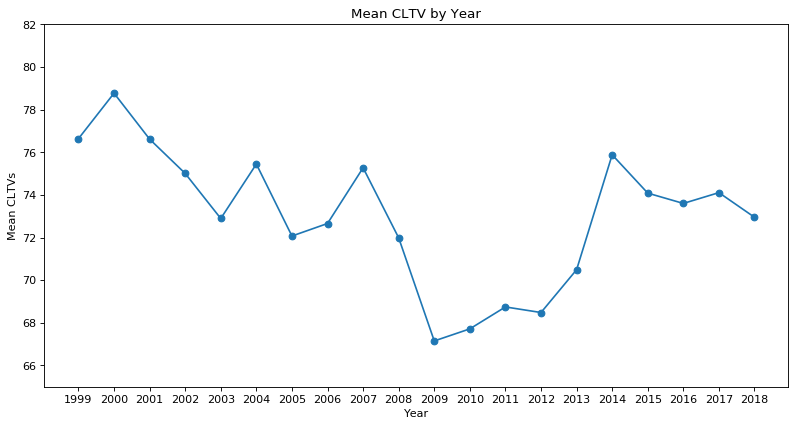

In [45]:
# Plotting the Mean CLTVs
labels_str = sorted([str(key) for key in CLTV_by_year.keys()])
labels = sorted([int(key) for key in CLTV_by_year.keys()])
heights = [CLTV_means[key]for key in labels]

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Year", ylabel="Mean CLTVs", xticklabels=labels, )
plt.title("Mean CLTV by Year")

plt.ylim(65,82)
plt.scatter(x=labels_str, y=heights, )
plt.plot(labels_str, heights)

plt.savefig('dist_mean_CLTV_year.png')

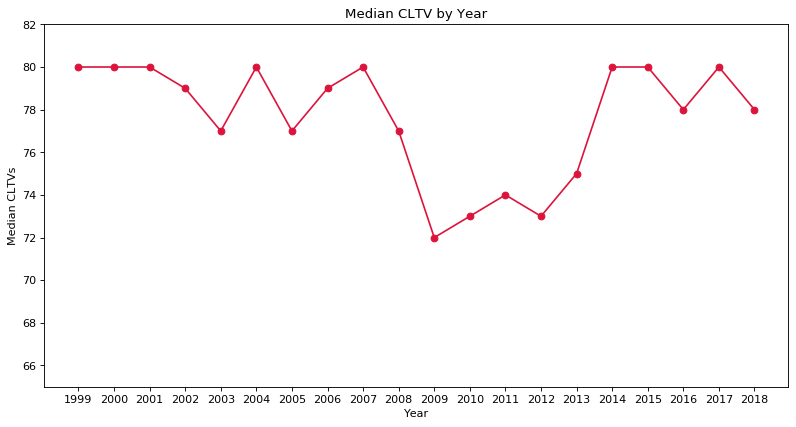

In [46]:
# Plotting the Median CLTVs
labels_str = sorted([str(key) for key in CLTV_by_year.keys()])
labels = sorted([int(key) for key in CLTV_by_year.keys()])
heights = [CLTV_medians[key]for key in labels]

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Year", ylabel="Median CLTVs", xticklabels=labels, )
plt.title("Median CLTV by Year")
plt.ylim(65,82)

plt.scatter(x=labels_str, y=heights, color="crimson")
plt.plot(labels_str, heights, color="crimson")

plt.savefig('dist_median_CLTV_year.png')

# Now lets begin manipulating data in the Monthly Progress file

## Just a bit of preprocessing.

In [47]:
update_df.describe()

,monthly_reporting_period,current_actual_upb,loan_age,months_to_maturity,zero_balance_code,zero_balance_date,current_interest_rate,current_deffered_upb,ddlpi,mi_recoveries,non_mi_recoveries,expenses,legal_costs,maintenance_preservation_costs,taxes_insurance,misc_expenses,actual_loss_calculation,modification_cost,estimated_ltv
count,3.139431e+06,3.139431e+06,3.139431e+06,3.139431e+06,41675.000000,41675.000000,3.139431e+06,3.139431e+06,3051.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,70053.000000,629260.000000
mean,2.014252e+05,1.703254e+05,5.017247e+01,2.710650e+02,1.344331,201354.886335,4.722770e+00,2.182818e+02,201271.180597,8614.080868,5477.325444,-15373.760355,-3316.919625,-4857.492604,-6563.236686,-636.146943,-68557.753452,438.475429,53.192386
std,2.730069e+02,1.087168e+05,4.042225e+01,8.316521e+01,1.727437,256.874615,1.121410e+00,3.855349e+03,358.093056,20207.430619,24944.967943,17280.219500,2790.270690,7616.040555,11070.149293,5896.273212,61934.478349,4671.589954,20.408147
min,2.010010e+05,0.000000e+00,0.000000e+00,-1.000000e+00,1.000000,201001.000000,0.000000e+00,0.000000e+00,200705.000000,0.000000,-7853.000000,-160298.000000,-41199.000000,-65821.000000,-125312.000000,-25841.000000,-520030.000000,-2243.530000,0.000000
25%,2.012030e+05,9.009045e+04,1.800000e+01,2.130000e+02,1.000000,201112.000000,3.875000e+00,0.000000e+00,201003.000000,0.000000,153.750000,-20771.000000,-4635.250000,-6103.500000,-7949.500000,-1032.000000,-100212.500000,0.000000,38.900000
50%,2.014100e+05,1.455604e+05,4.000000e+01,2.980000e+02,1.000000,201305.000000,4.625000e+00,0.000000e+00,201112.000000,0.000000,1025.000000,-11301.000000,-3051.000000,-1934.000000,-3593.000000,-400.000000,-56666.500000,0.000000,54.900000
75%,2.017020e+05,2.288113e+05,7.300000e+01,3.360000e+02,1.000000,201603.000000,5.625000e+00,0.000000e+00,201603.000000,0.000000,2291.750000,-4871.250000,-1533.000000,-80.000000,-1144.750000,-220.000000,-23757.750000,0.000000,68.300000
max,2.019030e+05,1.203000e+06,2.410000e+02,4.800000e+02,15.000000,201903.000000,3.750000e+01,1.889712e+05,201901.000000,164453.000000,344156.000000,187918.000000,0.000000,0.000000,61264.000000,258299.000000,55007.000000,167815.930000,414.600000


In [0]:
update_df.insert(2, "Year", update_df["monthly_reporting_period"].floordiv(100))

## Lets begin by considering Loan Ages of loans from after 2014

In [49]:
# This dataset is more complex so lets look at how it has stored different data types.
update_df.dtypes

loan_sequence_number               object
monthly_reporting_period            int64
Year                                int64
current_actual_upb                float64
current_lds                        object
loan_age                            int64
months_to_maturity                  int64
repurchase_flag                    object
modification_flag                  object
zero_balance_code                 float64
zero_balance_date                 float64
current_interest_rate             float64
current_deffered_upb              float64
ddlpi                             float64
mi_recoveries                     float64
net_sales_proceeds                 object
non_mi_recoveries                 float64
expenses                          float64
legal_costs                       float64
maintenance_preservation_costs    float64
taxes_insurance                   float64
misc_expenses                     float64
actual_loss_calculation           float64
modification_cost                 

In [50]:
# Now lets simply get rid of all the monthly reporting records from before 2014:
only_after_2014df = update_df.copy()
only_after_2014df = only_after_2014df[only_after_2014df["Year"] >= 2014]

only_after_2014df[only_after_2014df["loan_age"] >= 1].describe()

,monthly_reporting_period,Year,current_actual_upb,loan_age,months_to_maturity,zero_balance_code,zero_balance_date,current_interest_rate,current_deffered_upb,ddlpi,mi_recoveries,non_mi_recoveries,expenses,legal_costs,maintenance_preservation_costs,taxes_insurance,misc_expenses,actual_loss_calculation,modification_cost,estimated_ltv
count,1.785482e+06,1.785482e+06,1.785482e+06,1.785482e+06,1.785482e+06,17493.000000,17493.000000,1.785482e+06,1.785482e+06,1158.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,45871.000000,626880.000000
mean,2.016300e+05,2.016237e+03,1.740543e+05,5.352462e+01,2.632062e+02,1.252901,201616.980792,4.312090e+00,2.807972e+02,201640.514680,2452.276824,1191.798283,-10970.111588,-2458.203863,-1062.703863,-7178.748927,-270.506438,-45093.006438,628.486867,53.115069
std,1.499869e+02,1.503863e+00,1.117759e+05,4.382134e+01,8.934424e+01,1.786916,141.516394,9.962494e-01,4.371848e+03,270.680357,10768.059664,3389.708983,22101.122173,3675.199079,3079.509414,16415.340141,12122.578778,62414.661354,5685.073649,20.380906
min,2.014010e+05,2.014000e+03,0.000000e+00,1.000000e+00,-1.000000e+00,1.000000,201401.000000,2.000000e+00,0.000000e+00,200710.000000,0.000000,0.000000,-122269.000000,-41199.000000,-34098.000000,-109737.000000,-15090.000000,-443661.000000,-2243.530000,0.000000
25%,2.015060e+05,2.015000e+03,8.983985e+04,2.000000e+01,1.790000e+02,1.000000,201506.000000,3.625000e+00,0.000000e+00,201411.000000,0.000000,0.000000,-14608.500000,-4256.000000,-499.750000,-6755.500000,-647.500000,-56712.000000,0.000000,38.800000
50%,2.016100e+05,2.016000e+03,1.486189e+05,4.100000e+01,2.960000e+02,1.000000,201608.000000,4.125000e+00,0.000000e+00,201711.000000,0.000000,0.000000,-3595.500000,-728.500000,-86.000000,-855.500000,-220.000000,-25005.500000,0.000000,54.800000
75%,2.018010e+05,2.018000e+03,2.368437e+05,7.400000e+01,3.360000e+02,1.000000,201710.000000,4.750000e+00,0.000000e+00,201901.000000,0.000000,1048.500000,-220.000000,0.000000,0.000000,0.000000,-105.000000,-6394.750000,0.000000,68.200000
max,2.019030e+05,2.019000e+03,1.201000e+06,2.410000e+02,4.800000e+02,15.000000,201903.000000,3.750000e+01,1.889712e+05,201901.000000,91790.000000,37723.000000,187918.000000,0.000000,0.000000,61264.000000,258299.000000,30101.000000,167815.930000,414.600000


But this includes all of the individual monthly progress reporting too. 

What if we only considered the records for the zero-balance records once Freddie Mac is done with them.
(As well as the records from March 2019, the last update)


In [51]:
# All terminated loans since 2014
zero_balance_after_2014df = only_after_2014df[only_after_2014df["zero_balance_code"] >= 1]
zero_balance_after_2014df = zero_balance_after_2014df[zero_balance_after_2014df["loan_age"] > 0]
zero_balance_after_2014df.describe()

,monthly_reporting_period,Year,current_actual_upb,loan_age,months_to_maturity,zero_balance_code,zero_balance_date,current_interest_rate,current_deffered_upb,ddlpi,mi_recoveries,non_mi_recoveries,expenses,legal_costs,maintenance_preservation_costs,taxes_insurance,misc_expenses,actual_loss_calculation,modification_cost,estimated_ltv
count,17493.000000,17493.000000,17493.0,17493.000000,17493.000000,17493.000000,17493.000000,17493.000000,17493.000000,607.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,17493.000000,0.0
mean,201616.980449,2016.104556,0.0,64.661236,257.394329,1.252901,201616.980792,4.608754,342.932412,201458.036244,2452.276824,1191.798283,-10970.111588,-2458.203863,-1062.703863,-7178.748927,-270.506438,-45093.006438,808.901773,NaN
std,141.516651,1.418850,0.0,44.779525,87.053137,1.786916,141.516394,1.018411,5079.802925,238.508647,10768.059664,3389.708983,22101.122173,3675.199079,3079.509414,16415.340141,12122.578778,62414.661354,6624.799560,NaN
min,201401.000000,2014.000000,0.0,1.000000,-1.000000,1.000000,201401.000000,2.000000,0.000000,200710.000000,0.000000,0.000000,-122269.000000,-41199.000000,-34098.000000,-109737.000000,-15090.000000,-443661.000000,-2243.530000,NaN
25%,201506.000000,2015.000000,0.0,28.000000,199.000000,1.000000,201506.000000,3.875000,0.000000,201308.000000,0.000000,0.000000,-14608.500000,-4256.000000,-499.750000,-6755.500000,-647.500000,-56712.000000,0.000000,NaN
50%,201608.000000,2016.000000,0.0,56.000000,284.000000,1.000000,201608.000000,4.500000,0.000000,201501.000000,0.000000,0.000000,-3595.500000,-728.500000,-86.000000,-855.500000,-220.000000,-25005.500000,0.000000,NaN
75%,201710.000000,2017.000000,0.0,91.000000,327.000000,1.000000,201710.000000,5.250000,0.000000,201611.000000,0.000000,1048.500000,-220.000000,0.000000,0.000000,0.000000,-105.000000,-6394.750000,0.000000,NaN
max,201903.000000,2019.000000,0.0,241.000000,478.000000,15.000000,201903.000000,10.100000,188971.210000,201901.000000,91790.000000,37723.000000,187918.000000,0.000000,0.000000,61264.000000,258299.000000,30101.000000,167815.930000,NaN


In [52]:
# All loans still open (March 2019)
still_pendingdf = only_after_2014df[only_after_2014df["monthly_reporting_period"] == 201903]
still_pendingdf = still_pendingdf[still_pendingdf["loan_age"] > 0]
still_pendingdf.describe()

,monthly_reporting_period,Year,current_actual_upb,loan_age,months_to_maturity,zero_balance_code,zero_balance_date,current_interest_rate,current_deffered_upb,ddlpi,mi_recoveries,non_mi_recoveries,expenses,legal_costs,maintenance_preservation_costs,taxes_insurance,misc_expenses,actual_loss_calculation,modification_cost,estimated_ltv
count,28622.0,28622.0,2.862200e+04,28622.000000,28622.000000,262.000000,262.0,28622.000000,28622.00000,546.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28622.000000,25549.000000
mean,201903.0,2019.0,1.747754e+05,65.441863,252.018552,2.286260,201903.0,4.160379,179.87361,201848.650183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545.712362,50.102583
std,0.0,0.0,1.127793e+05,44.863283,90.878905,4.045493,0.0,0.860716,3312.09337,106.583027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5223.075922,20.016628
min,201903.0,2019.0,0.000000e+00,14.000000,3.000000,1.000000,201903.0,2.000000,0.00000,200901.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1568.380000,0.100000
25%,201903.0,2019.0,8.849245e+04,31.000000,166.000000,1.000000,201903.0,3.625000,0.00000,201812.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,35.900000
50%,201903.0,2019.0,1.511835e+05,53.000000,287.000000,1.000000,201903.0,4.000000,0.00000,201901.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,51.600000
75%,201903.0,2019.0,2.407966e+05,83.000000,326.000000,1.000000,201903.0,4.500000,0.00000,201901.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,64.900000
max,201903.0,2019.0,1.151097e+06,241.000000,480.000000,15.000000,201903.0,9.875000,156319.17000,201901.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120969.780000,402.600000


In [53]:
# How many of the terminated loans in different ways?
zero_balance_distribution = zero_balance_after_2014df["zero_balance_code"].value_counts()
zero_balance_distribution

1.0     16963
15.0      284
2.0       158
3.0        50
6.0        38
Name: zero_balance_code, dtype: int64

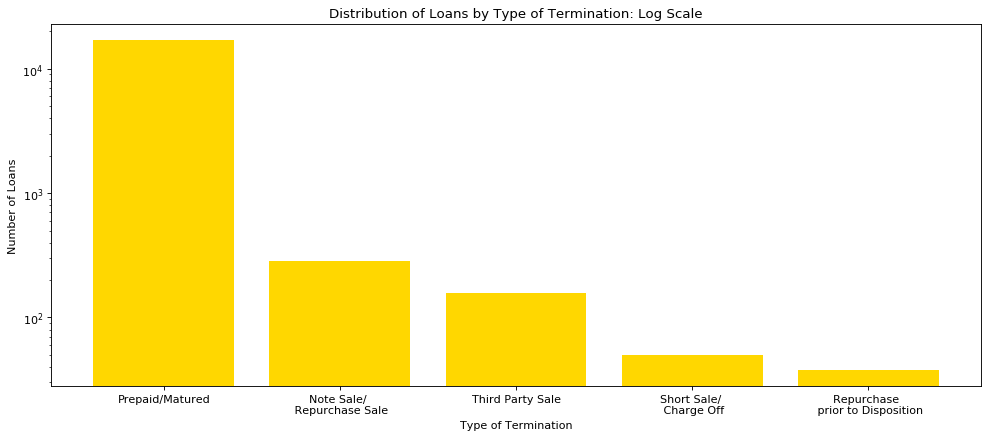

In [54]:
# Plotting the Zero Balance Codes

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Type of Termination", ylabel="Number of Loans")
plt.title("Distribution of Loans by Type of Termination: Log Scale")
labels_str = ["Prepaid/Matured", "Note Sale/ \n Repurchase Sale", "Third Party Sale", "Short Sale/ \n Charge Off", "Repurchase \n prior to Disposition"]
# labels = sorted([key for key in PPM_by_year.keys()])
heights = zero_balance_distribution.values
# zero_balance_distribution
plt.bar(labels_str, heights, log=True, color="gold")
plt.savefig('dist_termination_log.png')

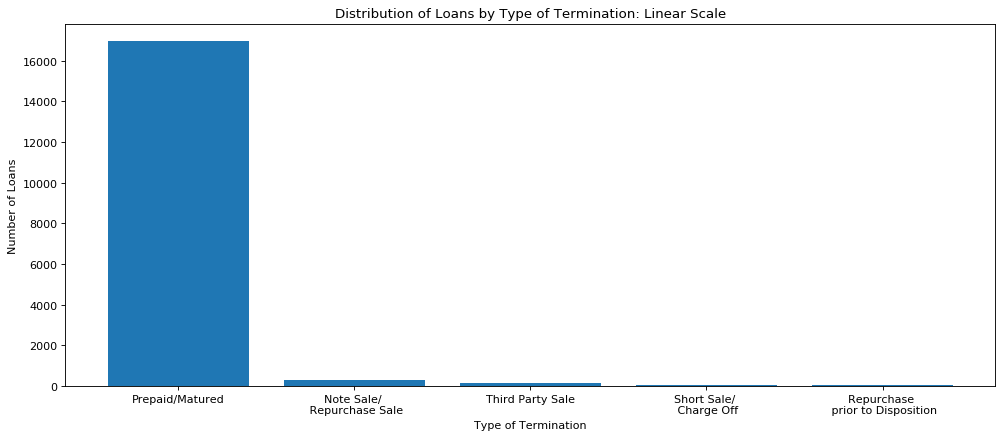

In [55]:
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Type of Termination", ylabel="Number of Loans")
plt.title("Distribution of Loans by Type of Termination: Linear Scale")

labels_str = ["Prepaid/Matured", "Note Sale/ \n Repurchase Sale", "Third Party Sale", "Short Sale/ \n Charge Off", "Repurchase \n prior to Disposition"]
# labels = sorted([key for key in PPM_by_year.keys()])
heights = zero_balance_distribution.values
plt.bar(labels_str, heights, log=False)
plt.savefig('dist_termination.png')

As we can see above, the vast majority of terminated loans is in terms of Matured/Prepaid loans.

## Now as part of the prompt, lets consider only the year 2016, and only Prepaid/Charged Off loans.

In [56]:
# IF YOU'RE ONLY INTERESTED IN IR C
prepaid_or_CO_2016df = zero_balance_after_2014df[zero_balance_after_2014df["Year"] == 2016]
prepaid_or_CO_2016df = prepaid_or_CO_2016df[prepaid_or_CO_2016df["zero_balance_code"] <= 3.0]
prepaid_or_CO_2016df = prepaid_or_CO_2016df[prepaid_or_CO_2016df["zero_balance_code"] != 2.0]
prepaid_or_CO_2016df["zero_balance_code"].value_counts()

1.0    4132
3.0       5
Name: zero_balance_code, dtype: int64

Now, we can find the (Min, Mean, Median, Max) for loan age, Months to Maturity and Current Interest Rates ALL AT ONCE:

In [57]:
prepaid_or_CO_2016df.describe()

,monthly_reporting_period,Year,current_actual_upb,loan_age,months_to_maturity,zero_balance_code,zero_balance_date,current_interest_rate,current_deffered_upb,ddlpi,mi_recoveries,non_mi_recoveries,expenses,legal_costs,maintenance_preservation_costs,taxes_insurance,misc_expenses,actual_loss_calculation,modification_cost,estimated_ltv
count,4137.000000,4137.0,4137.0,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,66.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4137.000000,0.0
mean,201607.062606,2016.0,0.0,57.968576,264.247281,1.002417,201607.062606,4.492757,14.148741,201538.075758,9763.400000,4024.400000,-38783.200000,-3971.80000,-390.000000,-33905.400000,-516.000000,-114599.400000,328.610723,NaN
std,3.282433,0.0,0.0,42.677839,83.941362,0.069496,3.282433,0.925011,569.650025,132.759622,21831.626092,6127.249326,48294.238416,3299.41657,310.865727,45149.263702,306.255612,139178.948677,3626.130846,NaN
min,201601.000000,2016.0,0.0,1.000000,0.000000,1.000000,201601.000000,2.000000,0.000000,201005.000000,0.000000,0.000000,-118485.000000,-8134.00000,-825.000000,-109737.000000,-1040.000000,-350559.000000,0.000000,NaN
25%,201604.000000,2016.0,0.0,25.000000,206.000000,1.000000,201604.000000,3.875000,0.000000,201511.000000,0.000000,0.000000,-50931.000000,-6883.00000,-600.000000,-41672.000000,-525.000000,-123206.000000,0.000000,NaN
50%,201607.000000,2016.0,0.0,47.000000,292.000000,1.000000,201607.000000,4.375000,0.000000,201602.000000,0.000000,2667.000000,-11205.000000,-2368.00000,-270.000000,-8970.000000,-400.000000,-62402.000000,0.000000,NaN
75%,201610.000000,2016.0,0.0,81.000000,331.000000,1.000000,201610.000000,4.875000,0.000000,201606.000000,0.000000,2740.000000,-7956.000000,-1565.00000,-150.000000,-5138.000000,-315.000000,-34300.000000,0.000000,NaN
max,201612.000000,2016.0,0.0,212.000000,477.000000,3.000000,201612.000000,8.500000,26500.000000,201610.000000,48817.000000,14715.000000,-5339.000000,-909.00000,-105.000000,-4010.000000,-300.000000,-2530.000000,83656.040000,NaN


In [58]:
prepaid_or_CO_2016df

,loan_sequence_number,monthly_reporting_period,Year,current_actual_upb,current_lds,loan_age,months_to_maturity,repurchase_flag,modification_flag,zero_balance_code,zero_balance_date,current_interest_rate,current_deffered_upb,ddlpi,mi_recoveries,net_sales_proceeds,non_mi_recoveries,expenses,legal_costs,maintenance_preservation_costs,taxes_insurance,misc_expenses,actual_loss_calculation,modification_cost,step_modification_flag,deferred_payment_modification,estimated_ltv
608,F101Q4161660,201603,2016,0.0,0,172,188,N,NaN,1.0,201603.0,8.250,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
936,F110Q1086486,201604,2016,0.0,0,73,287,N,NaN,1.0,201604.0,5.170,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
997,F199Q4111678,201602,2016,0.0,0,195,165,N,NaN,1.0,201602.0,7.750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1281,F101Q1209729,201607,2016,0.0,0,183,471,N,NaN,1.0,201607.0,7.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
2083,F104Q3120502,201608,2016,0.0,1,143,263,N,NaN,1.0,201608.0,2.000,0.0,201606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35536.55,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133373,F101Q3248421,201612,2016,0.0,0,183,177,N,NaN,1.0,201612.0,7.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
3135370,F107Q2132911,201608,2016,0.0,0,111,249,N,NaN,1.0,201608.0,7.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
3135996,F199Q2189293,201608,2016,0.0,0,207,153,N,NaN,1.0,201608.0,7.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
3136336,F107Q4127939,201609,2016,0.0,0,105,255,N,NaN,1.0,201609.0,7.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN


In [0]:
p_o_co_2016_IR = {}
i = 0
for loan in prepaid_or_CO_2016df["loan_sequence_number"]:
  p_o_co_2016_IR[loan] = [prepaid_or_CO_2016df["current_interest_rate"].iloc[i]]
  i+= 1

for loan in p_o_co_2016_IR.keys():
  orig_loan = orig_df.loc[orig_df["loan_sequence_number"] == loan]
  ir = np.float(orig_loan.loc[:,"original_rate"])
  p_o_co_2016_IR[loan].append(ir)


In [0]:
# Finally, calculate the change in interest rate for all of these loans
for loan in p_o_co_2016_IR.keys():
  both = p_o_co_2016_IR[loan]
  difference = both[0] - both[1]
  p_o_co_2016_IR[loan].append(difference)


In [0]:
all_differences_2016 = [p_o_co_2016_IR[x][2] for x in p_o_co_2016_IR.keys()]

In [62]:
min_change = str(np.min(all_differences_2016))
first_quartile_change = str(np.percentile(all_differences_2016, 25))
mean_change = str(np.mean(all_differences_2016) )
median_change = str(np.percentile(all_differences_2016, 50))
third_quartile_change = str(np.percentile(all_differences_2016, q=75))
max_change = str(np.max(all_differences_2016))

print("min:" + min_change + "\nfirst quartile:"+ first_quartile_change + "\nmedian:" + median_change + "\nthird quartile:"+ third_quartile_change +  "\nmax:" + max_change + "\nmean:" + mean_change)

min:-5.375
first quartile:0.0
median:0.0
third quartile:0.0
max:2.2888183615066282e-07
mean:-0.028009425954194006


That distribution isn't super telling, so lets plot a histogram

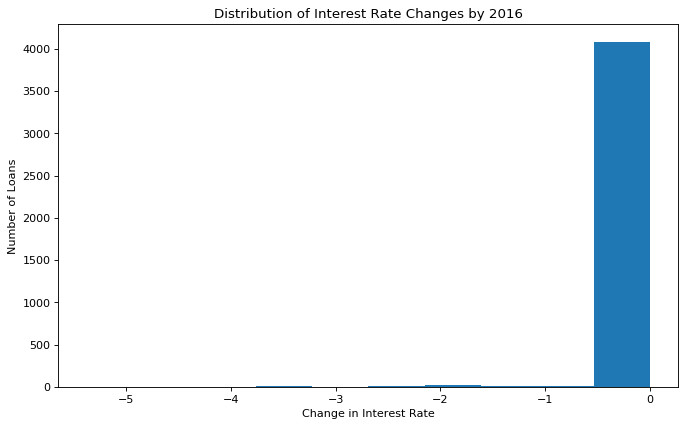

In [63]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Change in Interest Rate", ylabel="Number of Loans")
plt.title("Distribution of Interest Rate Changes by 2016")

plt.hist(all_differences_2016, log=False)
plt.savefig('dist_IR_2016.png')

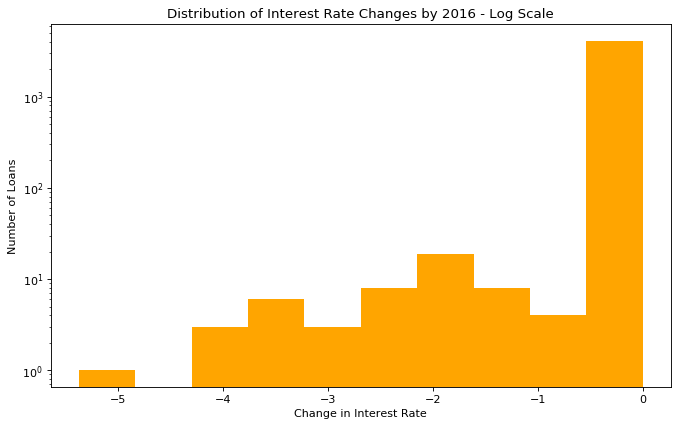

In [64]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Change in Interest Rate", ylabel="Number of Loans")
plt.title("Distribution of Interest Rate Changes by 2016 - Log Scale")

plt.hist(all_differences_2016, log=True, color="orange")
plt.savefig('dist_IR_2016_log.png')

## However, since this insight into the Interest Rates is so telling, lets extend this to the last 6 years, total. (But only for loans that matured vs loans that were charged off)

In [65]:
# IF YOU'RE ONLY INTERESTED IN IR FOR Repurchased vs Non-Repurchased
prepaid_or_COdf = zero_balance_after_2014df.copy()
prepaiddf = prepaid_or_COdf[prepaid_or_COdf["zero_balance_code"] <= 3.0]
prepaiddf = prepaiddf[prepaiddf["zero_balance_code"] != 2.0]


COdf = prepaid_or_COdf[prepaid_or_COdf["zero_balance_code"] > 1.0]
COdf = COdf[COdf["zero_balance_code"] != 3.0]

COdf["zero_balance_code"].value_counts()

15.0    284
2.0     158
6.0      38
Name: zero_balance_code, dtype: int64

In [66]:
prepaiddf["zero_balance_code"].value_counts()


1.0    16963
3.0       50
Name: zero_balance_code, dtype: int64

In [0]:
# extremely inefficient- would fix if had more time to optimise
p_IR = {}
i = 0
for loan in prepaiddf["loan_sequence_number"]:
  if prepaiddf["current_interest_rate"].iloc[i] > 0.1:
    p_IR[loan] = [prepaiddf["current_interest_rate"].iloc[i]]
  i+= 1

for loan in p_IR.keys():
  orig_loan = orig_df.loc[orig_df["loan_sequence_number"] == loan]
  ir = np.float(orig_loan.loc[:,"original_rate"])
  p_IR[loan].append(ir)


In [68]:
len(p_IR.keys())

17013

In [0]:
co_IR = {}
i = 0
for loan in COdf["loan_sequence_number"]:
  if COdf["current_interest_rate"].iloc[i] > 0.1:
    co_IR[loan] = [COdf["current_interest_rate"].iloc[i]]
  i+= 1

for loan in co_IR.keys():
  orig_loan = orig_df.loc[orig_df["loan_sequence_number"] == loan]
  ir = np.float(orig_loan.loc[:,"original_rate"])
  co_IR[loan].append(ir)


In [0]:
# Finally, calculate the interest for all of these loans
for loan in p_IR.keys():
  both = p_IR[loan]
  difference = both[0] - both[1]
  p_IR[loan].append(difference)


In [0]:
# Finally, calculate the interest for all of these loans
for loan in co_IR.keys():
  both = co_IR[loan]
  difference = both[0] - both[1]
  co_IR[loan].append(difference)


In [0]:
all_differences_p = [p_IR[x][2] for x in p_IR.keys()]

In [0]:
all_differences_co = [co_IR[x][2] for x in co_IR.keys()]

In [74]:
min_change = str(np.min(all_differences_p))
first_quartile_change = str(np.percentile(all_differences_p, 25))
mean_change = str(np.mean(all_differences_p) )
median_change = str(np.percentile(all_differences_p, 50))
third_quartile_change = str(np.percentile(all_differences_p, q=75))
max_change = str(np.max(all_differences_p))

print("min:" + min_change + "\nfirst quartile:"+ first_quartile_change + "\nmedian:" + median_change + "\nthird quartile:"+ third_quartile_change +  "\nmax:" + max_change + "\nmean:" + mean_change)

min:-5.375
first quartile:0.0
median:0.0
third quartile:0.0
max:0.125
mean:-0.025048491207273704


In [75]:
min_change = str(np.min(all_differences_co))
first_quartile_change = str(np.percentile(all_differences_co, 25))
mean_change = str(np.mean(all_differences_co) )
median_change = str(np.percentile(all_differences_co, 50))
third_quartile_change = str(np.percentile(all_differences_co, q=75))
max_change = str(np.max(all_differences_co))

print("min:" + min_change + "\nfirst quartile:"+ first_quartile_change + "\nmedian:" + median_change + "\nthird quartile:"+ third_quartile_change +  "\nmax:" + max_change + "\nmean:" + mean_change)

min:-5.125
first quartile:-2.0
median:0.0
third quartile:0.0
max:0.125
mean:-1.1166145818233488


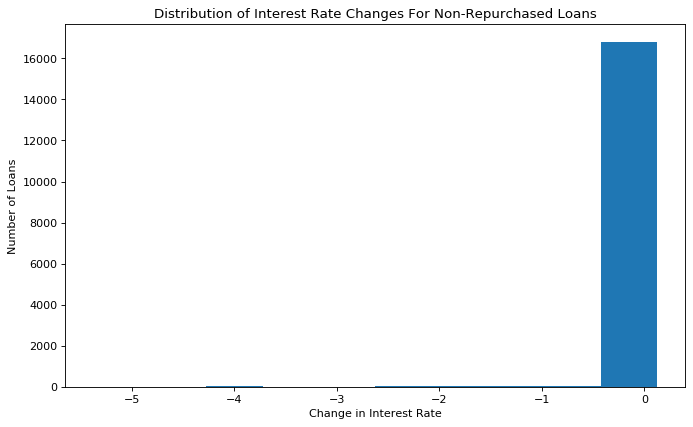

In [76]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Change in Interest Rate", ylabel="Number of Loans")
plt.title("Distribution of Interest Rate Changes For Non-Repurchased Loans")

plt.hist(all_differences_p, log=False)
plt.savefig('dist_IR_Non_ref.png')

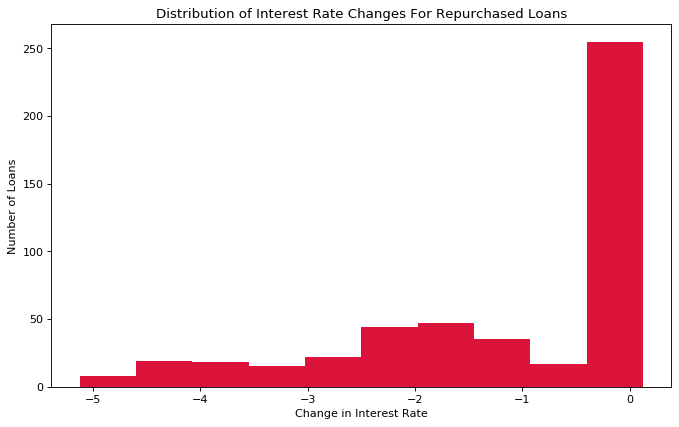

In [77]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Change in Interest Rate", ylabel="Number of Loans")
plt.title("Distribution of Interest Rate Changes For Repurchased Loans")

plt.hist(all_differences_co, log=False, color="crimson")
plt.savefig('dist_IR_ref.png')

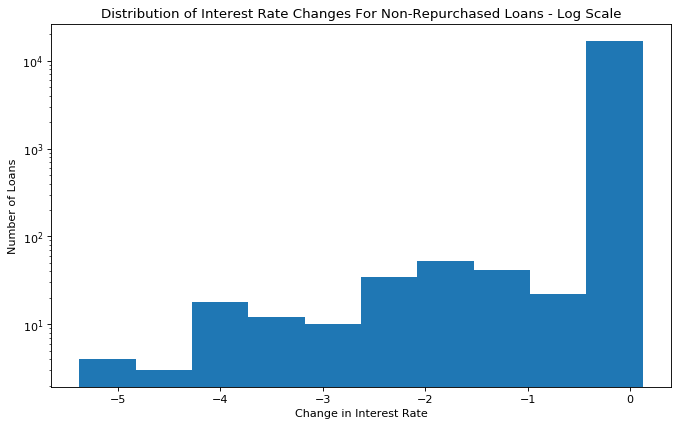

In [78]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Change in Interest Rate", ylabel="Number of Loans")
plt.title("Distribution of Interest Rate Changes For Non-Repurchased Loans - Log Scale")

plt.hist(all_differences_p, log=True)
plt.savefig('dist_IR_Non_ref_log.png')

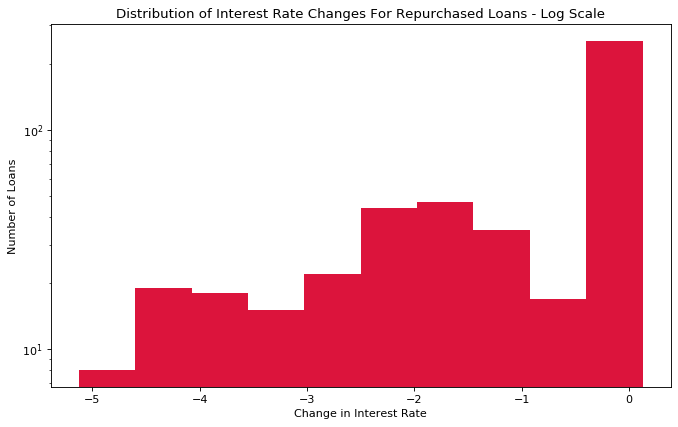

In [79]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Change in Interest Rate", ylabel="Number of Loans")
plt.title("Distribution of Interest Rate Changes For Repurchased Loans - Log Scale")

plt.hist(all_differences_co, log=True, color="crimson")
plt.savefig('dist_IR_ref_log.png')

While the size of the subset of loans that were refinanced was smaller than the ones that weren't- the distribution of larger Interst-rate modifications definitely skews more towards refinanced loans.

## Finally, lets take a look at DTI and Credit Scores, for Refinanced and non-Refinanced loans.

In [0]:
p_DTI = {}

i = 0
for loan in prepaiddf["loan_sequence_number"]:
  orig_loan = orig_df.loc[orig_df["loan_sequence_number"] == loan]
  dti = np.float(orig_loan.loc[:,"dti_ratio"])
  p_DTI[loan] = dti
  i+= 1

In [0]:
all_nonrefinanced_DTI = [p_DTI[x] for x in p_DTI.keys() if p_DTI[x] != 999]


In [0]:
c_DTI = {}

i = 0
for loan in COdf["loan_sequence_number"]:
  orig_loan = orig_df.loc[orig_df["loan_sequence_number"] == loan]
  dti = np.float(orig_loan.loc[:,"dti_ratio"])
  c_DTI[loan] = dti
  i+= 1

In [0]:
all_refinanced_DTI = [c_DTI[x] for x in c_DTI.keys() if c_DTI[x] != 999 ]

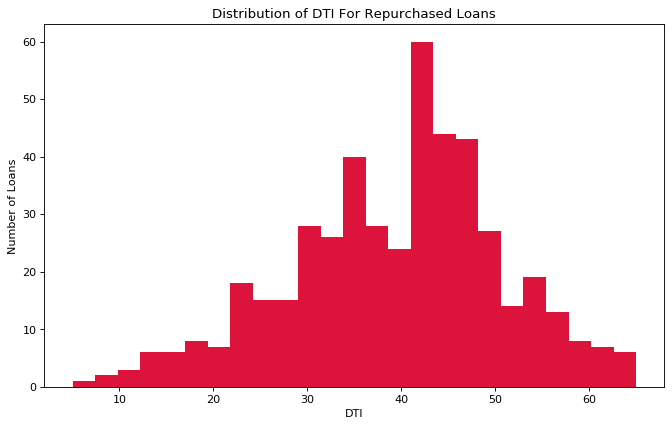

In [84]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="DTI", ylabel="Number of Loans")
plt.title("Distribution of DTI For Repurchased Loans")

plt.hist(all_refinanced_DTI, log=False, color="crimson", bins=25)
plt.savefig('dist_DTI_ref.png')

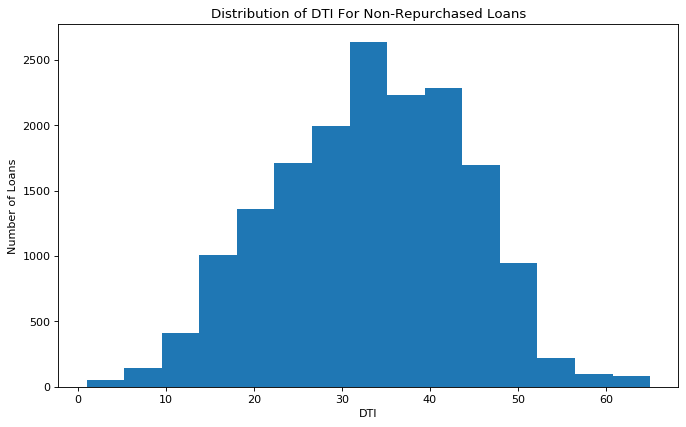

In [85]:

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="DTI", ylabel="Number of Loans")
plt.title("Distribution of DTI For Non-Repurchased Loans")

plt.hist(all_nonrefinanced_DTI, log=False, bins=15)

plt.savefig('dist_DTI_non_ref.png')

##Lets End by looking at credit scores in the same way.

In [0]:
p_credit = {}

i = 0
for loan in prepaiddf["loan_sequence_number"]:
  orig_loan = orig_df.loc[orig_df["loan_sequence_number"] == loan]
  dti = np.float(orig_loan.loc[:,"credit_score"])
  p_credit[loan] = dti
  i+= 1

In [0]:
all_nonrefinanced_credit = [p_credit[x] for x in p_credit.keys() if p_credit[x] != 9999]

In [0]:
c_credit = {}

i = 0
for loan in COdf["loan_sequence_number"]:
  orig_loan = orig_df.loc[orig_df["loan_sequence_number"] == loan]
  dti = np.float(orig_loan.loc[:,"credit_score"])
  c_credit[loan] = dti
  i+= 1

In [0]:
all_refinanced_credit = [c_credit[x] for x in c_credit.keys() if c_credit[x] != 9999 ]

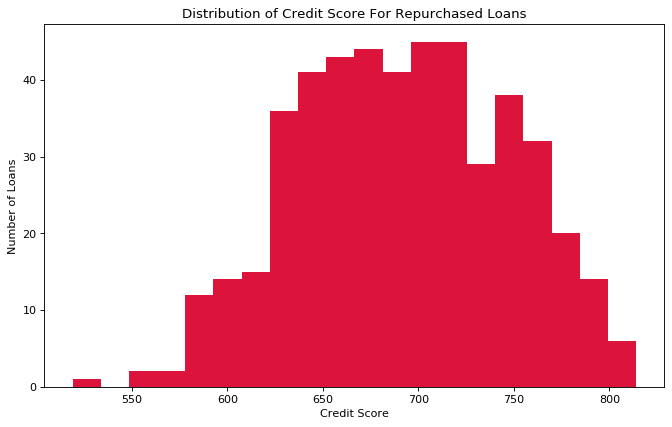

In [90]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Credit Score", ylabel="Number of Loans")
plt.title("Distribution of Credit Score For Repurchased Loans")

plt.hist(all_refinanced_credit, log=False, color="crimson", bins=20)
plt.savefig('dist_credit_ref.png')

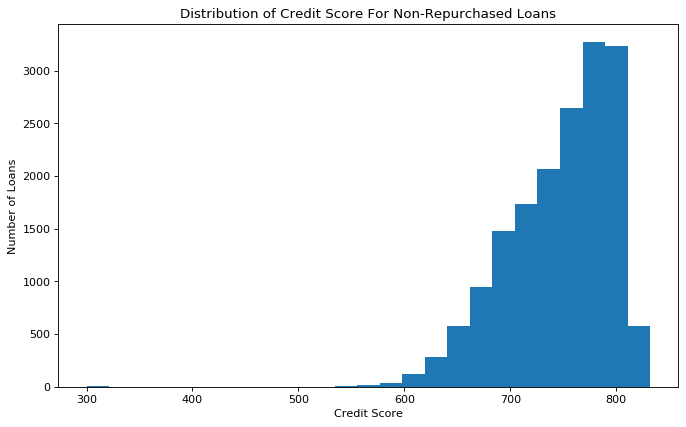

In [91]:

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axes(xlabel="Credit Score", ylabel="Number of Loans")
plt.title("Distribution of Credit Score For Non-Repurchased Loans")

plt.hist(all_nonrefinanced_credit, log=False, bins=25)
plt.savefig('dist_credit_non_ref.png')